<a href="https://colab.research.google.com/github/mishenkoil/optimization-methods/blob/main/met_opt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import pylab
from mpl_toolkits.mplot3d import Axes3D

# **Отчет по лабораторной работе №2**
[*Исходный код*](https://github.com/Rytuo/MetOpt/tree/master/lab2) <br>
***Преподаватель: Свинцов Михаил*** <br>
***Работу выполнили: Мищенко Илья, Мороз Николай, Попов Александр.***

# **Постановка задачи**
1.   Реализовать алгоритмы градиентных методов:
 *   метод градиентного спуска
 *   метод наискорейшего спуска
 *   метод сопряженных градиентов

> Оценить, как меняется скорость сходимости, если для поиска величины шага использовать различные методы одномерного поиска.

2.   Проанализировать траектории методов для нескольких квадратичных функций.

3.   Исследовать, как зависит число итераций, необходимое методам для сходимости, от следующих двух параметров:
*   числа обусловленности $k \geq 1$ оптимизируемой функции
*   размерности пространства $n$ оптимизируемых переменных





# **Теоретическое обоснование методов**

## 0. Общая теория для методов
Задана квадратичная функция: $f(x)=1/2(Ax, x)+(b,x)+c$ \\
Основа данных методов многомерной оптимизации - построение послеждовательности $x_i$ сохдящейся к глобальному минимуму функции.
В данных методах используется формула $x^{k+1}=x^k+α_kp^k$ , где вектор $p^k$ - направление поиска минимума, а число $α_k$ - величина шага
<ol>
  <li>$α_k$ - величина исчерпывающего спуска, если она находится из решения одномерной задачи минимизации: $Φ_k(α) → min, Φ_k(α)=f(x^k+αp^k)$
  <li>При исчерпывающем спуске выполняется условие: $(∇f(x^{k+1}),p^k) = 0$
  <li>Для кваратичной функции: $α_k=-(Ax^k + b, p^k) / (Ap^k, p^k)$
  <li>Вектор $p^k$ называется направлением убывания функции, если $f(x^k+αp^k) < f(x^k)$ для всех достаточно малых положительных α
  <li>Вектор максимального возрастания функции в точке - градиент $∇f(x^k)=Ax+b$
  <li>Вектор $p^k$ является направлением убывания функции, если $(∇f(x^k),p^k) < 0$
  <li>Функцию предполагаем дифференцирумой, то есть в качестве
прекращения итераций можно выбрать условие $||∇f(x^k)|| < ε$
</ol>

## 1. Метод градиентного спуска
Положим на каждом шаге $p^k=-∇f(x^k)$ \\
Зафиксируем начальное значение $α$
Тогда условие 6 выполняется и можно найти $α_k$ такое что выполнится условие **4** Будем уменьшать $α$ в **2** раза, пока не выполнится условие **4**

## 2. Метод наискорейшего спуска
Изменим способ вычисления шага: \\
Также положим на каждом шаге $p^k=-∇f(x^k)$ \\
Условие 6 также выполнится, но будем искать $α$ как решение задачи одномерной оптимизации: $Φ_k(α) → min, Φ_k(α)=f(x^k+αp^k)$ \\
Это позволит делать максимальный возможный шаг на итерации, и реже вычислять градиент

## 3. Метод сопряженных градиентов
Используем другой способ задания направления: \\
Положим $p^{k+1}=-∇f(x^{k+1})+β_kp^k$ \\
Использование предыдущего значения градиента при вычислении следующего позволяет более полно учесть особенности функции при нахождении ее минимума. \\

Идея: Выбираем последовательность A −ортогональных векторов $p^0,p^1, ...$. Тогда для поиска минимума нужно сделать не более n итераций - по одной на каждое направление. воспользуемся свойством таких векторов: $(Ap^{k+1},p^k)=0$ \\

Получаем формулу для $β_k=(A∇f(x^{k+1}), p^k) / (Ap^k, p^k)$ \\
После небольших преобразований получаем: $β_k= ||∇f(x^{k+1})||^2 / ||∇f(x^k)||^2$ \\

В данном методе может накапливаться погрешность, так как он сильно зависит от взаимного расположения вычисленных векторо-направлений. Поэтому каждые m итераций полагают $β_{nm}=0$ чтобы увеличить точность вычислений.

# **Оценка скорости сходимости при использовании различных методов одномерной оптимизации**

В ходе анализа траектории методов в п. 1.2, были использованы различные методы одномерной оптимизации. Все они показали существенный прирост по сравнению с фиксированным шагом.

Среди них, лучше всего себя зарекомендовали Метод (641 итерация) парабол и метод Фиббоначи (630 итераций), остальные показали на ~5/10% худший результат.

Поэтому дальше, для одномерной оптимизации, будет использоваться метод Фиббоначи.

# **Анализ траектории методов**




**1.   Плохо обусловленная задача**

>   Минимизировать функцию:
 $$f(x) = 128x_1^2 + 252x_1x_2 + 128x_2^2 − 10x_1 + 30x_2 + 13$$

Ей соответствует:

> Матрица: 
$$\begin{equation*}
A =
\begin{pmatrix}
128 & 126\\
126 & 128
\end{pmatrix}
\end{equation*}$$
> Вектор:
$$\begin{equation*}
B =
\begin{pmatrix}
-10\\
30
\end{pmatrix}
\end{equation*}$$
> Константа: $$C = 13$$
> Собственные числа: $$\lambda_1 = 254, \lambda_2 = 2$$
> Число обусловленности: $$\mu = 127$$

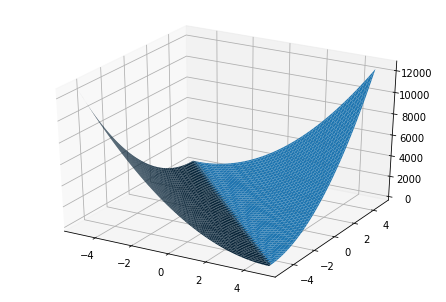

In [ ]:
def makeData(zgrid):
    x = np.arange(-5, 5, 0.1)
    y = np.arange(-5, 5, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)

    return xgrid, ygrid, zgrid(xgrid,ygrid)

def zgrid_1(xgrid, ygrid):    
  return 128 * xgrid ** 2 + 252 * xgrid * ygrid + 128 * ygrid ** 2 - 10 * xgrid + 30 * ygrid + 13

x, y, z = makeData(zgrid_1)
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z)

pylab.show()

In [ ]:
def parse_points(source):
  df = pd.read_csv(source)
  x_1, x_2 = [], []
  for i in df['x']:
    a, b = map(float, i[1:-1].split())
    x_1.append(a)
    x_2.append(b)
  return x_1, x_2

**1.1.   *Метод градиентного спуска***



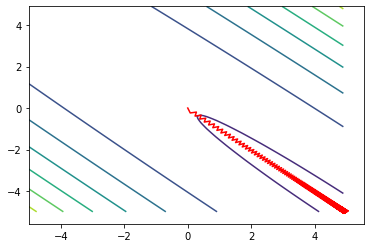

In [ ]:
x, y, z = makeData(zgrid_1)
pylab.contour(x, y, z)
x_1, x_2 = parse_points("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/gradient_descent_n2_k127.csv")
pylab.plot(x_1, x_2, 'r-')

pylab.show()

> Визуализация работы метода градиентного спуска для функции $f(x)$, запущенного из точки $(0, 0)$. Минимум найден за **921** итераций в точке $M(5.0394, -4.9606)$ c точностью $\varepsilon = 10^{-4}$.

**1.2.   *Метод наискорейшего спуска***

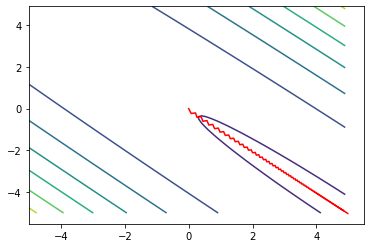

In [ ]:
x, y, z = makeData(zgrid_1)
pylab.contour(x, y, z)
x_1, x_2 = parse_points("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/steepest_descent_n2_k127.csv")
pylab.plot(x_1, x_2, 'r-')

pylab.show()

> Визуализация работы метода наискорейшего спуска спуска для функции $f(x)$, запущенного из точки $(0, 0)$. Задача одномерной оптимизации решалась методом Фиббоначи. Минимум найден за **630** итераций в точке $M(4.9803, -5.0197)$ c точностью $\varepsilon = 10^{-4}$.

**1.3.   *Метод сопряженных градиентов***

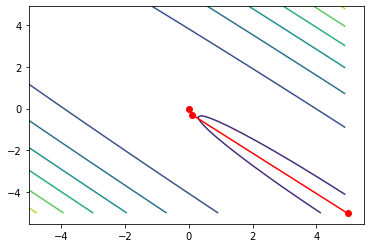

In [ ]:
x, y, z = makeData(zgrid_1)
pylab.contour(x, y, z)
x_1, x_2 = parse_points("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/conjugate_gradient_n2_k127.csv")
pylab.plot(x_1, x_2, 'ro-')

pylab.show()

> Визуализация работы метода сопряженных градиентов для функции $f(x)$, запущенного из точки $(0, 0)$. Минимум найден за **3** итераций в точке $M(4.9803, -5.0197)$ c точностью $\varepsilon = 10^{-4}$.

**2.   Хорошо обусловленная задача**

>   Минимизировать функцию:
 $$f(x) = 2x_1^2 + 2x_2^2 + 5x_1 - 5x_2 + 10$$

Ей соответствует:

> Матрица: 
$$\begin{equation*}
A =
\begin{pmatrix}
2 & 0\\
0 & 2
\end{pmatrix}
\end{equation*}$$
> Вектор:
$$\begin{equation*}
B =
\begin{pmatrix}
5\\
-5
\end{pmatrix}
\end{equation*}$$
> Константа: $$C = 10$$
> Собственные числа: $$\lambda_1 = 2, \lambda_2 = 2$$
> Число обусловленности: $$\mu = 1$$

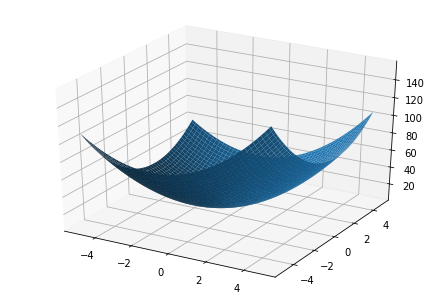

In [ ]:
def zgrid_2(xgrid, ygrid):    
  return 2 * xgrid ** 2 + 2 * ygrid ** 2 + 5 * xgrid - 5 * ygrid + 10

x, y, z = makeData(zgrid_2)

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z)

pylab.show()

**2.1.   *Метод градиентного спуска***



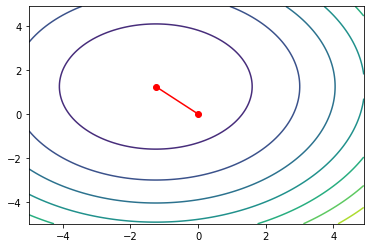

In [ ]:
x, y, z = makeData(zgrid_2)
pylab.contour(x, y, z)
x_1, x_2 = parse_points("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/gradient_descent_n2_k1.csv")
pylab.plot(x_1, x_2, 'ro-')

pylab.show()

> Визуализация работы метода градиентного спуска для функции $f(x)$, запущенного из точки $(0, 0)$. Минимум найден за **2** итерации в точке $M(-1.2500, 1.2500)$ c точностью $\varepsilon = 10^{-4}$.

**2.2.   *Метод наискорейшего спуска***

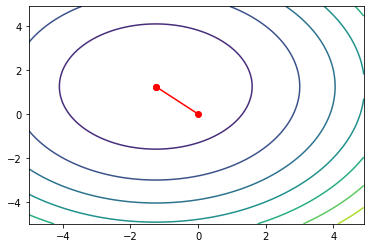

In [ ]:
x, y, z = makeData(zgrid_2)
pylab.contour(x, y, z)
x_1, x_2 = parse_points("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/steepest_descent_n2_k1.csv")
pylab.plot(x_1, x_2, 'ro-')

pylab.show()

> Визуализация работы метода наискорейшего спуска спуска для функции $f(x)$, запущенного из точки $(0, 0)$. Задача одномерной оптимизации решалась методом Фиббоначи. Минимум найден за **2** итерации в точке $M(-1.2500, 1.2500)$ c точностью $\varepsilon = 10^{-4}$.

**2.3.   *Метод сопряженных градиентов***

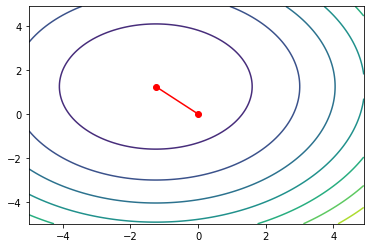

In [ ]:
x, y, z = makeData(zgrid_2)
pylab.contour(x, y, z)
x_1, x_2 = parse_points("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/conjugate_gradient_n2_k1.csv")
pylab.plot(x_1, x_2, 'ro-')

pylab.show()

> Визуализация работы метода сопряженных градиентов для функции $f(x)$, запущенного из точки $(0, 0)$. Минимум найден за **2** итерации в точке $M(-1.2500, 1.2500)$ c точностью $\varepsilon = 10^{-4}$.

> Эмпирическим путем, можно сделать вывод, что число обусловленности матрицы напрямую влияет на время сходимости наших методов.

# **Анализ числа итераций от числа обусловенности $K$ и <br> размерности пространства $N$**

Для данной задачи мы генерировали диагональные матрицы размера $N$ с заданным числом обусловленности $k$ и сравнивали количество итераций методов.

Результаты эксперимента:

**Метод градиентного спуска**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/nk_table_descent.tsv", sep='\t')
df.head()

,N\K,1,50,100
0,10,1,412,795
1,100,1,407,774
2,1000,1,385,771


**Метод наискорейшего спуска**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/nk_table_steepest.tsv", sep='\t')
df.head()

,N\K,1,50,100
0,10,2,323,483
1,100,2,352,561
2,1000,2,346,603


**Метод сопряженных градиентов**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab2/output/nk_table_conjur.tsv", sep='\t')
df.head()

,N\K,1,50,100
0,10,1,10,10
1,100,1,30,33
2,1000,1,35,52


**Сравнительный график**

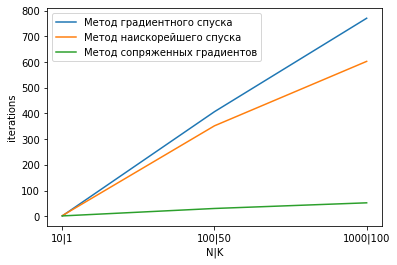

In [ ]:
fig, ax = plt.subplots()

ax.plot(['10|1', '100|50', '1000|100'], [1, 407, 771], label = 'Метод градиентного спуска')
ax.plot(['10|1', '100|50', '1000|100'], [2, 352, 603], label = 'Метод наискорейшего спуска')
ax.plot(['10|1', '100|50', '1000|100'], [1, 30, 52], label = 'Метод сопряженных градиентов')

ax.set_xlabel('N|K')
ax.set_ylabel('iterations')

plt.legend()
plt.show()

# **Вывод**

В ходе лабораторной работы мы выяснили, что:
* Большой вклад в скорость сходимости$(μ)$ алгоритма вносит **число обусловленности** исследуемой функции. При $μ=1$ алгоритмы сходятся за $O(1)$ итераций. При возрастании $μ$ количество итераций также возрастает.
* От размерности функции зависит скорость одной итерации.
* Используемые методы различаются только лишь выбором направления и шага
* В методе **градиентного спуска** используются довольно простые в реализации идеи. Он имеет неплохую точность и линейную сходимость, что достаточно для решения большинства прикладных задач.
* Метод **наискорейшего спуска** является очевидным улучшением предыдущего метода благодаря лучшему выбору шага на итерации. Это позволяет уменьшить общее количество вычислений градиента за счет решения задачи одномерной оптимизации.
* В свою очередь метод **сопряженных градиентов** берет предыдущий метод и изменяет выбор направления. Он минимизирует функцию по n A -ортогональным векторам, что позволяет решить задачу минимизации не более чем за n итераций. Данный выбор направлений почти полностью устраняет "зигзагообразность" графика минимизирующей последовательности за счет "более точного" выбора направления к глобальному минимуму. Это сильно увеличивает скорость сходимости.

**Итого:** мы советуем использовать метод сопряженных градиентов, так как сильно превосходит два других метода в производительности, а сложность его реализации не сильно выше.